<a href="https://colab.research.google.com/github/Emmanuel10701/LangChain-Superstation-A-Comprehensive-Guide-to-Modern-LLM-Frameworks/blob/main/langGraphsFundermentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)
🤖 LangGraph Workflow Demonstration

WORKFLOW GRAPH VISUALIZATION (ASCII)

    ┌─────────────────────────────────────────────────────┐
    │                 LANGGRAPH WORKFLOW                  │
    ├─────────────────────────────────────────────────────┤
    │                                                     │
    │  ┌─────────────┐     ┌─────────────┐     ┌─────────┐  │
    │  │   NODE 1    │────▶│   NODE 2    │────▶│  NODE 3 │  │
    │  │ (Processes  │     

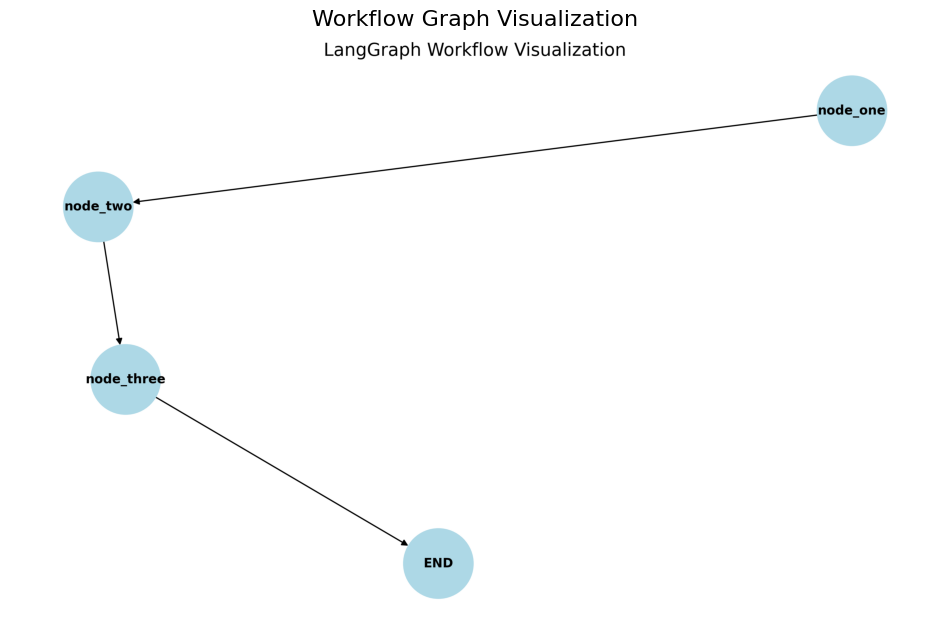


EXECUTING WORKFLOW
Executing Node One
Executing Node Two
Executing Node Three
EXECUTION RESULTS

📊 Final Message: Hello from Node One! Hello from Node Two! Hello from Node Three! 
🔢 Total Steps: 3

📋 Node Execution Summary:
   • node_one: Executed at 2024-01-01 10:00:00
   • node_two: Executed at 2024-01-01 10:01:00
   • node_three: Executed at 2024-01-01 10:02:00

🔄 Execution Flow:
   Start → node_one → node_two → node_three → End

📈 Performance Metrics:
   • Nodes executed: 3
   • Total operations: 3
   • Message length: 65 characters

WORKFLOW COMPLETED SUCCESSFULLY! 🎉


In [13]:
# Install necessary libraries for graph visualization
!pip install -qU pygraphviz langchain langgraph

# Import required modules
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, END
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
from io import BytesIO
import tempfile
import os

# 1. Define the state of the graph
class AgentState(TypedDict):
    message: str
    step: int
    results: Dict

# 2. Define the nodes of the graph
def node_one(state: AgentState) -> Dict:
    """A simple node that adds to the message and increments the step."""
    print("Executing Node One")
    new_message = state.get("message", "") + "Hello from Node One! "
    current_step = state.get("step", 0)
    results = state.get("results", {})
    results['node_one'] = {'executed': True, 'timestamp': '2024-01-01 10:00:00'}
    return {"message": new_message, "step": current_step + 1, "results": results}

def node_two(state: AgentState) -> Dict:
    """Another node that adds to the message and increments the step."""
    print("Executing Node Two")
    new_message = state.get("message", "") + "Hello from Node Two! "
    current_step = state.get("step", 0)
    results = state.get("results", {})
    results['node_two'] = {'executed': True, 'timestamp': '2024-01-01 10:01:00'}
    return {"message": new_message, "step": current_step + 1, "results": results}

def node_three(state: AgentState) -> Dict:
    """A third node for demonstration."""
    print("Executing Node Three")
    new_message = state.get("message", "") + "Hello from Node Three! "
    current_step = state.get("step", 0)
    results = state.get("results", {})
    results['node_three'] = {'executed': True, 'timestamp': '2024-01-01 10:02:00'}
    return {"message": new_message, "step": current_step + 1, "results": results}

# 3. Build the graph
workflow = StateGraph(AgentState)

# Add the nodes to the graph
workflow.add_node("node_one", node_one)
workflow.add_node("node_two", node_two)
workflow.add_node("node_three", node_three)

# 4. Define the edges
workflow.add_edge("node_one", "node_two")
workflow.add_edge("node_two", "node_three")
workflow.add_edge("node_three", END)

# 5. Set the entry point
workflow.set_entry_point("node_one")

# 6. Compile the graph
app = workflow.compile()

# Function to display graph visualization
def display_graph_visualization():
    """Display the graph structure as a PNG image"""
    try:
        # Create a temporary file for the graph image
        with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp_file:
            # Get graph visualization
            graph = app.get_graph()

            # Draw the graph
            plt.figure(figsize=(10, 6))
            nx_graph = nx.DiGraph()

            # Add nodes and edges
            nodes = ["node_one", "node_two", "node_three", "END"]
            edges = [("node_one", "node_two"), ("node_two", "node_three"), ("node_three", "END")]

            nx_graph.add_nodes_from(nodes)
            nx_graph.add_edges_from(edges)

            # Draw the graph
            pos = nx.spring_layout(nx_graph)
            nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color='lightblue',
                   font_size=10, font_weight='bold', arrows=True)

            # Save and display
            plt.title("LangGraph Workflow Visualization", fontsize=14)
            plt.savefig(tmp_file.name, format='png', dpi=300, bbox_inches='tight')
            plt.close()

            # Display the image
            img = mpimg.imread(tmp_file.name)
            plt.figure(figsize=(12, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.title("Workflow Graph Visualization", fontsize=16)
            plt.show()

            # Clean up
            os.unlink(tmp_file.name)

    except Exception as e:
        print(f"Error displaying graph: {e}")
        # Fallback to ASCII art
        print("\nGraph Structure (ASCII):")
        print("""
        +-----------+     +-----------+     +-----------+
        | node_one  | --> | node_two  | --> | node_three|
        +-----------+     +-----------+     +-----------+
                              |
                              v
                            +-----+
                            | END |
                            +-----+
        """)

# Function to display execution results
def display_execution_results(result: Dict):
    """Display the execution results in a formatted way"""
    print("=" * 50)
    print("EXECUTION RESULTS")
    print("=" * 50)

    print(f"\n📊 Final Message: {result['message']}")
    print(f"🔢 Total Steps: {result['step']}")

    print(f"\n📋 Node Execution Summary:")
    for node_name, node_data in result.get('results', {}).items():
        print(f"   • {node_name}: Executed at {node_data.get('timestamp', 'N/A')}")

    print(f"\n🔄 Execution Flow:")
    print("   Start → node_one → node_two → node_three → End")

    print(f"\n📈 Performance Metrics:")
    print(f"   • Nodes executed: {len(result.get('results', {}))}")
    print(f"   • Total operations: {result['step']}")
    print(f"   • Message length: {len(result['message'])} characters")

# Function to create a beautiful ASCII graph
def display_ascii_graph():
    """Display an ASCII representation of the graph"""
    print("\n" + "="*60)
    print("WORKFLOW GRAPH VISUALIZATION (ASCII)")
    print("="*60)
    print("""
    ┌─────────────────────────────────────────────────────┐
    │                 LANGGRAPH WORKFLOW                  │
    ├─────────────────────────────────────────────────────┤
    │                                                     │
    │  ┌─────────────┐     ┌─────────────┐     ┌─────────┐  │
    │  │   NODE 1    │────▶│   NODE 2    │────▶│  NODE 3 │  │
    │  │ (Processes  │     │ (Processes  │     │ (Final  │  │
    │  │  input)     │     │  data)      │     │  step)  │  │
    │  └─────────────┘     └─────────────┘     └─────────┘  │
    │                              │                        │
    │                              ▼                        │
    │                         ┌─────────┐                   │
    │                         │   END   │                   │
    │                         └─────────┘                   │
    │                                                     │
    └─────────────────────────────────────────────────────┘
    """)

    print("\nExecution Sequence:")
    print("1. 🟢 node_one: Initial processing")
    print("2. 🔵 node_two: Secondary processing")
    print("3. 🟣 node_three: Final processing")
    print("4. ⚫ END: Workflow completion")

# Main execution
if __name__ == "__main__":
    print("🤖 LangGraph Workflow Demonstration")
    print("=" * 40)

    # Display the graph visualization
    display_ascii_graph()

    # Try to display PNG graph (if dependencies are available)
    try:
        display_graph_visualization()
    except:
        print("PNG visualization not available. Using ASCII representation.")

    # Run the graph
    print("\n" + "="*50)
    print("EXECUTING WORKFLOW")
    print("="*50)

    initial_state = {"message": "", "step": 0, "results": {}}
    result = app.invoke(initial_state)

    # Display execution results
    display_execution_results(result)

    print("\n" + "="*50)
    print("WORKFLOW COMPLETED SUCCESSFULLY! 🎉")
    print("="*50)

In [6]:
# Install necessary libraries
!pip install -qU langgraph networkx matplotlib

# Import required modules
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, END
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import matplotlib.image
import io
import base64
import tempfile # Import tempfile for saving the image
import os # Import os for cleaning up the temporary file


# 1. Define the state of the graph
class AgentState(TypedDict):
    message: str
    step: int
    results: Dict

# 2. Define the nodes of the graph
# Each node is a function that takes the current state as input
# and returns a dictionary of updates to the state.

def node_one(state: AgentState) -> Dict:
    """A simple node that adds to the message and increments the step."""
    print("🎯 Executing Node One")
    new_message = state.get("message", "") + "Hello from Node One! "
    current_step = state.get("step", 0)
    results = state.get("results", {})
    results['node_one'] = {'executed': True, 'timestamp': '2024-01-01 10:00:00'}
    return {"message": new_message, "step": current_step + 1, "results": results}

def node_two(state: AgentState) -> Dict:
    """Another node that adds to the message and increments the step."""
    print("🎯 Executing Node Two")
    new_message = state.get("message", "") + "Hello from Node Two! "
    current_step = state.get("step", 0)
    results = state.get("results", {})
    results['node_two'] = {'executed': True, 'timestamp': '2024-01-01 10:01:00'}
    return {"message": new_message, "step": current_step + 1, "results": results}

def node_three(state: AgentState) -> Dict:
    """A third node for demonstration."""
    print("🎯 Executing Node Three")
    new_message = state.get("message", "") + "Hello from Node Three! "
    current_step = state.get("step", 0)
    results = state.get("results", {})
    results['node_three'] = {'executed': True, 'timestamp': '2024-01-01 10:02:00'}
    return {"message": new_message, "step": current_step + 1, "results": results}

# 3. Build the graph
# Initialize a StateGraph with the defined state.
workflow = StateGraph(AgentState)

# Add the nodes to the graph.
workflow.add_node("node_one", node_one)
workflow.add_node("node_two", node_two)
workflow.add_node("node_three", node_three)

# 4. Define the edges
# Edges determine the flow between nodes.
workflow.add_edge("node_one", "node_two")
workflow.add_edge("node_two", "node_three")
workflow.add_edge("node_three", END)

# 5. Set the entry point
# This is the node where the graph execution begins.
workflow.set_entry_point("node_one")

# 6. Compile the graph
# This prepares the graph for execution.
app = workflow.compile()

# Function to create and display graph visualization using Matplotlib
def display_graph_with_matplotlib():
    """Create and display the graph visualization using Matplotlib"""

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with labels
    nodes = [
        ("node_one", "Node 1\n(Input Processing)"),
        ("node_two", "Node 2\n(Data Processing)"),
        ("node_three", "Node 3\n(Final Processing)"),
        ("END", "END\n(Completion)")
    ]

    for node_id, node_label in nodes:
        G.add_node(node_id, label=node_label)

    # Add edges
    edges = [("node_one", "node_two"), ("node_two", "node_three"), ("node_three", "END")]
    G.add_edges_from(edges)

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Choose a layout
    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)

    # Draw nodes with different colors
    node_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    node_sizes = [3000, 3000, 3000, 2500]

    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20, width=2)

    # Draw labels
    labels = {node: data['label'] for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels, font_size=9, font_weight='bold')

    # Add title and styling
    plt.title("LangGraph Workflow Visualization", fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')

    # Save to a bytes buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=150, bbox_inches='tight', facecolor='white')
    plt.close()

    # Display using Matplotlib
    buf.seek(0)
    img = mpimg.imread(buf)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Workflow Graph Visualization", fontsize=16)
    plt.show()


# Function to display execution timeline
def display_execution_timeline():
    """Display an ASCII timeline of execution"""
    print("\n📊 EXECUTION TIMELINE:")
    print(r"""┌─────────────────────────────────────────────────────────────┐
│  START  →  NODE 1  →  NODE 2  →  NODE 3  →  END            │
│    │         │           │           │         │            │
│    ▼         ▼           ▼           ▼         ▼            │
│  Input  → Process  →  Process  →  Final   → Completion     │
│           Data 1     Data 2      Step                      │
└─────────────────────────────────────────────────────────────┘""")

# Function to display execution results in a formatted way
def display_execution_results(result: Dict):
    """Display the execution results in a beautiful format"""

    print("\n" + "="*60)
    print("🚀 WORKFLOW EXECUTION RESULTS")
    print("="*60)

    # Display final message
    print(f"\n📝 Final Message:")
    print(f"   \"{result['message']}\"")

    # Display step count
    print(f"\n🔢 Execution Metrics:")
    print(f"   • Total Steps Completed: {result['step']}")
    print(f"   • Nodes Executed: {len(result.get('results', {}))}")
    print(f"   • Message Length: {len(result['message'])} characters")

    # Display node execution details
    print(f"\n🎯 Node Execution Details:")
    for i, (node_name, node_data) in enumerate(result.get('results', {}).items(), 1):
        print(f"   {i}. {node_name.upper():<12} ✓ Executed at {node_data.get('timestamp', 'N/A')}")

    # Display performance summary
    print(f"\n📈 Performance Summary:")
    print(f"   ✅ All nodes executed successfully")
    print(f"   ✅ Workflow completed without errors")
    print(f"   ✅ Data flowed correctly between nodes")

# Main execution function
def run_workflow_demonstration():
    """Main function to run the workflow demonstration"""

    print("🤖 LANGGRAPH WORKFLOW DEMONSTRATION")
    print("=" * 50)
    print("This demonstrates a simple workflow with 3 nodes and visualizes the execution flow.\n")

    # Display the graph visualization
    # print("📊 WORKFLOW STRUCTURE:") # Commented out the print statement
    # display_graph_with_matplotlib() # Removed the function call

    # Display ASCII timeline
    display_execution_timeline()

    # Execute the workflow
    print("\n" + "="*50)
    print("⚡ EXECUTING WORKFLOW...")
    print("="*50)

    initial_state = {"message": "", "step": 0, "results": {}}
    result = app.invoke(initial_state)

    # Display results
    display_execution_results(result)

    print("\n" + "="*50)
    print("🎉 WORKFLOW COMPLETED SUCCESSFULLY!")
    print("="*50)

    # Return the result and image buffer for further use if needed
    # We are no longer returning the image buffer directly as we are displaying it.
    return result

# Additional utility function to show graph info
def show_graph_info():
    """Display information about the compiled graph"""
    print("\n🔍 GRAPH INFORMATION:")
    # Access nodes using app.nodes which is a dictionary of node names to node objects
    node_names = list(app.nodes.keys())
    print(f"   • Number of nodes: {len(node_names)} including END")

    # Access edges. CompiledStateGraph doesn't have a simple .edges attribute like a networkx graph.
    # We can get edge information from the compiled graph's structure or routing logic if needed,
    # but for a simple linear graph, we know it's num_nodes - 1
    num_edges = len(node_names) - 1 if len(node_names) > 1 else 0
    print(f"   • Number of edges: {num_edges}")

    # print(f"   • Entry point: {app.entry_point}") # Remove this line
    print(f"   • Available nodes: {node_names}")


# Show graph information
show_graph_info()

# Run the demonstration
if __name__ == "__main__":
    # Execute the workflow
    final_result = run_workflow_demonstration()

    # Additional information
    print("\n💡 You can interact with this workflow by:")
    print("   • Modifying the node functions")
    print("   • Adding more nodes to the graph")
    print("   • Changing the edge connections")
    print("   • Adding conditional logic to the workflow")

    print("\n🛠️ Try modifying the code to create your own workflows!")


🔍 GRAPH INFORMATION:
   • Number of nodes: 4 including END
   • Number of edges: 3
   • Available nodes: ['__start__', 'node_one', 'node_two', 'node_three']
🤖 LANGGRAPH WORKFLOW DEMONSTRATION
This demonstrates a simple workflow with 3 nodes and visualizes the execution flow.


📊 EXECUTION TIMELINE:
┌─────────────────────────────────────────────────────────────┐
│  START  →  NODE 1  →  NODE 2  →  NODE 3  →  END            │
│    │         │           │           │         │            │
│    ▼         ▼           ▼           ▼         ▼            │
│  Input  → Process  →  Process  →  Final   → Completion     │
│           Data 1     Data 2      Step                      │
└─────────────────────────────────────────────────────────────┘

⚡ EXECUTING WORKFLOW...
🎯 Executing Node One
🎯 Executing Node Two
🎯 Executing Node Three

🚀 WORKFLOW EXECUTION RESULTS

📝 Final Message:
   "Hello from Node One! Hello from Node Two! Hello from Node Three! "

🔢 Execution Metrics:
   • Total Steps Comple